['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']


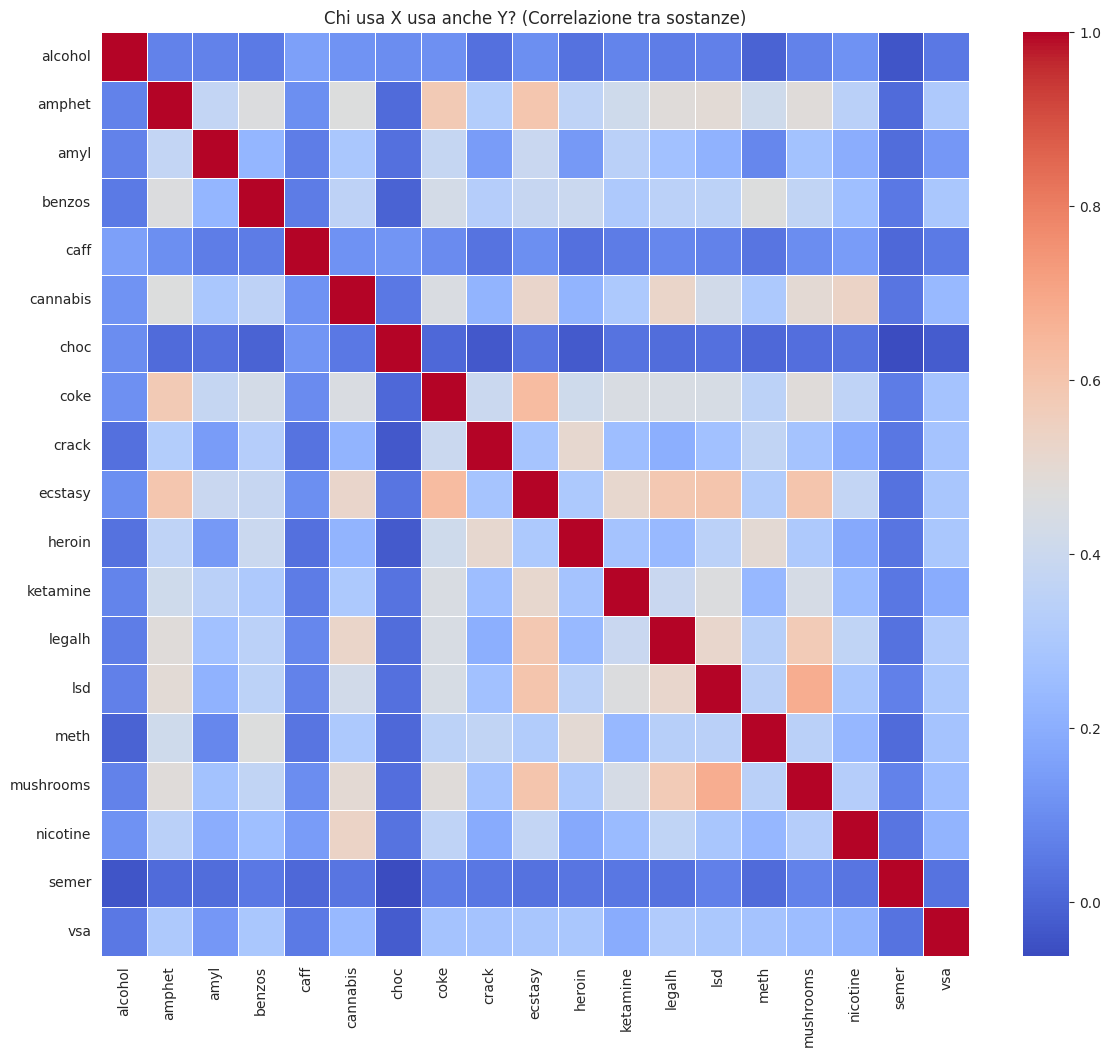

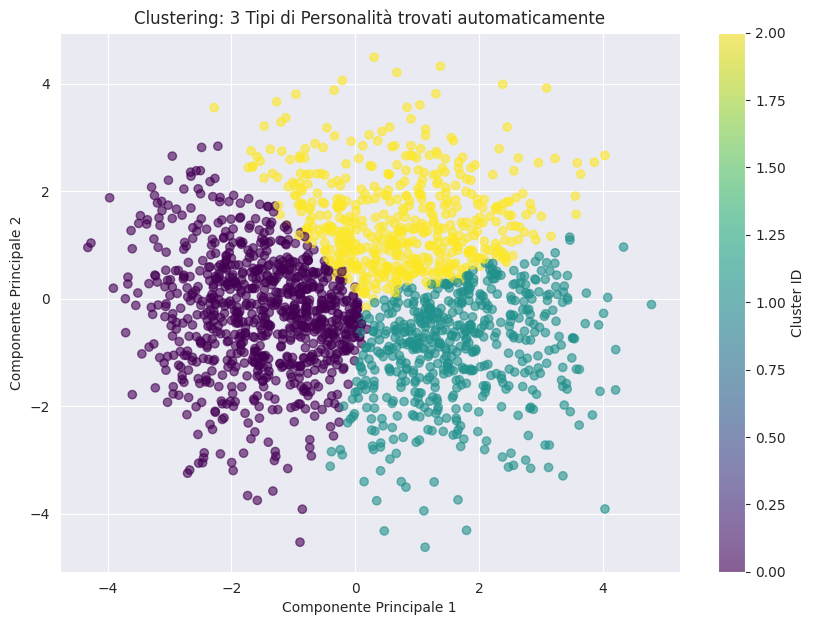


--- ANALISI DEI CLUSTER (Profili Psicologici) ---
Percentuale di consumatori di Cannabis per gruppo:
Cluster
0    40.095465
1    92.393321
2     84.84252
Name: Uses_Cannabis, dtype: object
------------------------------
Interpretazione: Se un cluster ha una % molto più alta, hai trovato il gruppo a rischio!


In [6]:
!pip install ucimlrepo -q
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd

drug_consumption = fetch_ucirepo(id=373)

pd.set_option('future.no_silent_downcasting', True) # pulizia warning non necessario di pandas

# Prendiamo tutte le colonne target
targets = drug_consumption.data.targets.copy()

targets_binary = targets.replace(
    {'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
)

# Calcoliamo la matrice di correlazione
corr_matrix = targets_binary.corr()

print(targets_binary.columns.tolist())


# Disegniamo la Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Chi usa X usa anche Y? (Correlazione tra sostanze)")
plt.show()

# CLUSTERING (K-MEANS)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Preparazione Dati (Solo personalità)
scaler = StandardScaler()
X = drug_consumption.data.features
X_scaled = scaler.fit_transform(X)

# 2. Creiamo 3 Cluster (Gruppi di persone simili)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 3. Visualizzazione (Usiamo PCA per schiacciare i dati in 2D e vederli)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
# Disegna i punti colorati in base al cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Clustering: 3 Tipi di Personalità trovati automaticamente")
plt.xlabel("Componente Principale 1")
plt.ylabel("Componente Principale 2")
plt.colorbar(scatter, label='Cluster ID')
plt.show()

# Aggiungiamo il cluster al dataset originale
X_with_cluster = X.copy()
X_with_cluster['Cluster'] = clusters
# Aggiungiamo una colonna "Usa Cannabis?" per vedere la differenza
X_with_cluster['Uses_Cannabis'] = targets_binary['cannabis']

# Calcoliamo la percentuale di consumatori per ogni cluster
analysis = X_with_cluster.groupby('Cluster')['Uses_Cannabis'].mean() * 100

print("\n--- ANALISI DEI CLUSTER (Profili Psicologici) ---")
print(f"Percentuale di consumatori di Cannabis per gruppo:")
print(analysis)
print("-" * 30)
print("Interpretazione: Se un cluster ha una % molto più alta, hai trovato il gruppo a rischio!")

